<a href="https://colab.research.google.com/github/PRAMODA1621/CNNFromScratch/blob/main/CNNUsingNumpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
data=pd.read_csv('/content/drive/MyDrive/fashion-mnist_train.csv')


In [101]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)

In [103]:
print(m,n)

60000 785


In [104]:
train_data=data[0:int(0.8*m),:]
val_data=data[int(0.8*m):m,:]
X_train=train_data[:,1:].T
X_train=X_train/255.0
Y_train=train_data[:,0]
X_val=val_data[:,1:].T
X_val=X_val / 255.0
Y_val=val_data[:,0]


In [105]:
print(X_val.shape)
print(Y_val.shape)
print(X_train.shape)
print(Y_train.shape)

(784, 12000)
(12000,)
(784, 48000)
(48000,)


In [106]:
def initialize_parameters():
  W1=np.random.rand(10,784)-0.5
  B1=np.random.rand(10,1)-0.5
  W2=np.random.rand(10,10)-0.5
  B2=np.random.rand(10,1)-0.5
  return W1,B1,W2,B2

In [110]:
def ReLU(X):
  return np.maximum(X,0)
def softmax(Z):
  Z_shifted=Z-np.max(Z,axis=0)
  exp_Z = np.exp(Z_shifted)
  return exp_Z / np.sum(exp_Z, axis=0)
def forward_propogation(W1,B1,W2,B2,X):
  Z1=W1.dot(X) + B1
  A1=ReLU(Z1)
  Z2=W2.dot(A1) + B2
  A2=softmax(Z2)
  return Z1,A1,Z2,A2
def one_hot_encoding(Y):
  one_hot_Y=np.zeros((Y.size,Y.max()+1))
  one_hot_Y[np.arange(Y.size),Y]=1
  return one_hot_Y.T
def backward_propogation(W1,B1,W2,B2,A1,Z1,A2,Z2,X,Y):
  one_hot_Y=one_hot_encoding(Y)
  dZ2=A2-one_hot_Y
  dW2=1/m*dZ2.dot(A1.T)
  dB2=1/m*np.sum(dZ2)
  dZ1=W2.T.dot(dZ2) * (Z1>0)
  dW1=1/m*dZ1.dot(X.T)
  dB1=1/m*np.sum(dZ1)
  return dW1,dB1,dW2,dB2
def update_parameter(W1,B1,W2,B2,dW1,dB1,dW2,dB2,learning_rate):
  W1=W1-learning_rate*dW1
  B1=B1-learning_rate*dB1
  W2=W2-learning_rate*dW2
  B2=B2-learning_rate*dB2
  return W1,B1,W2,B2
def get_predictions(A2):
  return np.argmax(A2,0)
def get_accuracy(predictions,Y):
  return np.sum(predictions==Y)/Y.size
def gradients(X,Y,learning_rate,iterations):
  W1,B1,W2,B2=initialize_parameters()
  for i in range(iterations):
    Z1,A1,Z2,A2=forward_propogation(W1,B1,W2,B2,X)
    dW1,dB1,dW2,dB2=backward_propogation(W1,B1,W2,B2,A1,Z1,A2,Z2,X,Y)
    W1,B1,W2,B2=update_parameter(W1,B1,W2,B2,dW1,dB1,dW2,dB2,learning_rate)
    if(i%20)==0:
      print("Iteration: ",i)
      print("Accuracy : ",get_accuracy(get_predictions(A2),Y))
  return W1,B1,W2,B2
W1,B1,W2,B2=gradients(X_train,Y_train,0.15,1000)

Iteration:  0
Accuracy :  0.0734375
Iteration:  20
Accuracy :  0.311625
Iteration:  40
Accuracy :  0.4761458333333333
Iteration:  60
Accuracy :  0.5409375
Iteration:  80
Accuracy :  0.5773958333333333
Iteration:  100
Accuracy :  0.6069375
Iteration:  120
Accuracy :  0.6079166666666667
Iteration:  140
Accuracy :  0.623125
Iteration:  160
Accuracy :  0.6342291666666666
Iteration:  180
Accuracy :  0.6433958333333333
Iteration:  200
Accuracy :  0.6518125
Iteration:  220
Accuracy :  0.6604583333333334
Iteration:  240
Accuracy :  0.6676041666666667
Iteration:  260
Accuracy :  0.6750208333333333
Iteration:  280
Accuracy :  0.6822916666666666
Iteration:  300
Accuracy :  0.6895833333333333
Iteration:  320
Accuracy :  0.6966875
Iteration:  340
Accuracy :  0.7023125
Iteration:  360
Accuracy :  0.7076458333333333
Iteration:  380
Accuracy :  0.7117916666666667
Iteration:  400
Accuracy :  0.7153958333333333
Iteration:  420
Accuracy :  0.7185
Iteration:  440
Accuracy :  0.7213541666666666
Iteration: 

Predicted Label:  8
Actual Label:  8


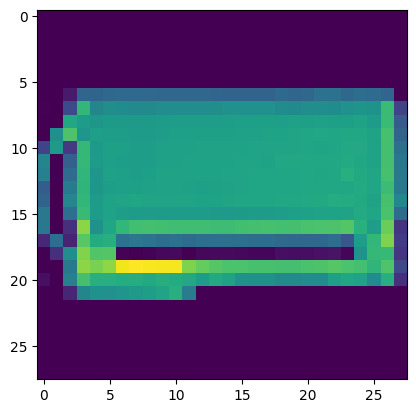

In [111]:
val_index=7984
Z1val,A1val,Z2val,A2val=forward_propogation(W1,B1,W2,B2,X_val[:,val_index,None])
print("Predicted Label: ",get_predictions(A2val)[0])
print("Actual Label: ",Y_val[val_index])
image_array=X_val[:,val_index].reshape(28,28)
plt.imshow(image_array)
plt.show()

In [112]:

Z1_val, A1_val, Z2_val, A2_val = forward_propogation(W1, B1, W2, B2, X_val)
val_acc = get_accuracy(get_predictions(A2_val), Y_val)
print("Validation accuracy:", val_acc)

Validation accuracy: 0.7831666666666667
